# t-검정

In [1]:
# 귀무가설 : 건전지의 수명은 1000시간이다
# 대립가설 : 건전지의 수명은 1000시간이 아니다.


In [2]:
battery <- c(980, 1008, 968, 1032, 1012,1002, 996, 1017)

In [3]:
# 데이터의 분포가 정규분포인지 확인 -> Shapiro-Wilk 검정을 실시(공식이 아주 복잡함)
# 귀무가설 : 자료가 정규분포 이다.
# 대립가설 : 자료가 정규분포가 아니다. 

In [4]:
shapiro.test(battery)


	Shapiro-Wilk normality test

data:  battery
W = 0.97706, p-value = 0.9469


# p-value = 0.9469 > 0.05 --> 귀무가설

----


In [5]:
# t-검정 실시
t.test(battery, mu = 1000, alternative = "two.sided")
# mu : 비교하는 대상의 평균
# alternative 
# - two.sided : 데이터와 평균이 다르다.
# - greater :  데이터가 평균보다 크니? 
# - less : 데이터가 평균보다 적다. 



	One Sample t-test

data:  battery
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


# p-value = 0.8032 > 0.05 --> 귀무가설

---

In [6]:
# 학교에 대한 데이터 
# 어떤 학급의 수학 점수 평균 : 55점 
# 방법 제시 : 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설: 성적은 오르지 않았다
# 대립가설 : 성적이 올랐다. 


# 귀무가설 : 저번주에 평균이 올랐으면 이번주도 올랐다. --> 변하지 않는것이 귀무가설
# 대립가설 : 변하지 않는것을 깨뜨리는게 대립가설 

In [7]:
exam <- read.csv("../Data/exam.csv")
head(exam)

no,score
1,58
2,49
3,39
4,99
5,32
6,88


In [8]:
score <- exam$score

In [9]:
# 정규 분포 확인
shapiro.test(score)


	Shapiro-Wilk normality test

data:  score
W = 0.91143, p-value = 0.1058


# p-value = 0.1058 > 0.05 --> 귀무가설

---

In [10]:
mean(score)

[1] 56.17647

In [11]:
summary(score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [12]:
# t-검정
# 저번 평균 보다 올랐냐?
# 전년도 평균보다 올랐냐?
t.test(score, mu = 55, alternative = "two.sided")


	One Sample t-test

data:  score
t = 0.24546, df = 16, p-value = 0.8092
alternative hypothesis: true mean is not equal to 55
95 percent confidence interval:
 46.01588 66.33706
sample estimates:
mean of x 
 56.17647 


# p-value = 0.4046 > 0.05 --> 귀무가설

---

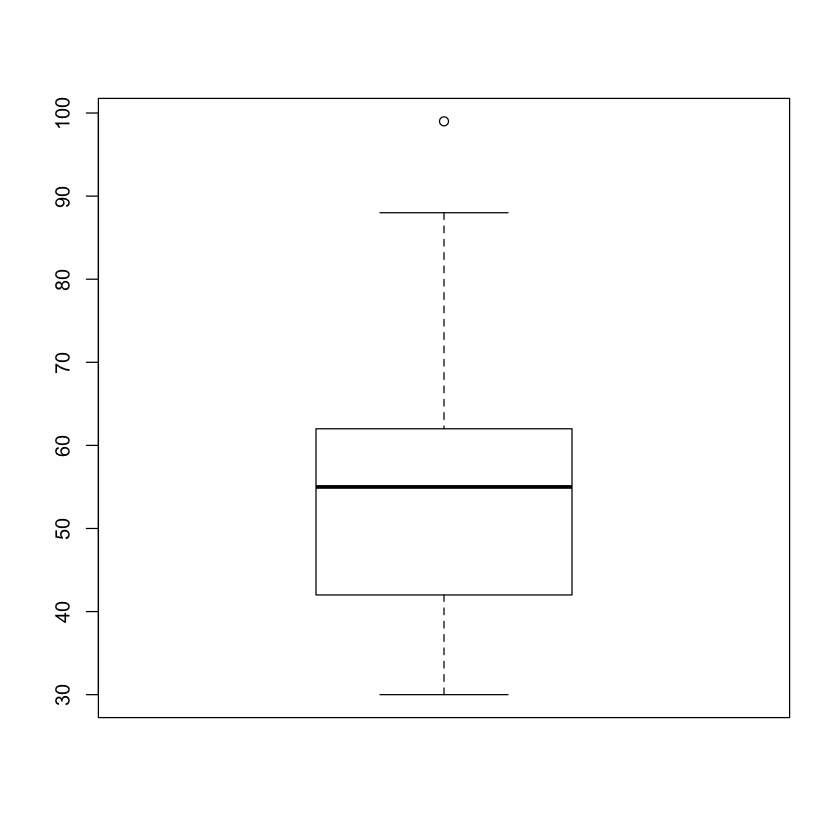

In [13]:
boxplot(score)

In [14]:
# 표본이 2개인 t-검정
# 귀무가설 : 복용 전후의 차이가 없다
# 대립가설 : 복용 전후의 차이가 있다.

In [15]:
pre<-read.csv("../Data/preMedicine.csv")
post<-read.csv("../Data/postMedicine.csv")

In [16]:
t.test(pre,post,alternative = "two.sided")


	Welch Two Sample t-test

data:  pre and post
t = -0.16869, df = 37.925, p-value = 0.8669
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.665328  2.255328
sample estimates:
mean of x mean of y 
    8.065     8.270 


# p-value = 0.8669 > 0.05 --> 귀무가설

In [17]:
x <- c(1,2,3,4)
y <- c(0,9,7,5)
# 상관계수 -> 관련이 있니??
# 44%정도
cor(x,y)

[1] 0.4345421

----
# 부호검정
: 2개의 데이터 사이에 차이가 있는지 검정

In [18]:
# 판단 데이터 
# 좋아하냐 안좋아하냐?

In [19]:
# 식사전과 식사후의 음료수 맛에 대한 평가 

# 식사전의 음료수 맛에 대한 평가 점수
x <- c(4,1,1,4,3,3,2,5,3,3)
# 식사후의 음료수 맛에 대한 평가 점수 
y <- c(1,1,3,2,5,1,4,4,3,1)


#### 귀무가설 : 유의한 차이가 없다.
#### 대립가설 : 유의한 차이가 있다.

In [20]:
# x,y의 크기가 누가 큰지 알려줘야 binom 쓸수있다
binom.test(c(length(x[x>y]), length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


# p-value = 0.7266 > 0.05 --> 귀무가설
---

## 콜모고로프- 스미노프 검정(->KS Test 라 한다)
: 주어진 2개의 데이터가 같은 분포인지를 검정

In [21]:
# 귀무가설, 대립가설이 정해져 있다

# 귀무가설 : 두개의 데이터 분포가 다르다
# 대립가설 : 두개의 데이터 분포가 같다. 

In [22]:
x <- runif(50)
y <- runif(50)
ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.14, p-value = 0.7166
alternative hypothesis: two-sided


# p-value = 0.8693 > 0.05 --> 귀무가설
---

## 비율검정 (Percentage)
: 2개의 데이터사이에 비율의 차이가 있는지에 대한 검정

In [23]:
# 실질적으로 데이터가 4개가 존재하는 것이다. 

In [24]:
# 맥주를 좋아하시나요? 라는 질문에
# 서울에서는 400명중 360명
# 부산에서는 200명중 136명이 좋다고 답했다면
# 둘의 비율의 차이가 있다고 말 할 수 있는가?
---
# 귀무가설 : 유의한 차이가 없다. 
# 대립가설 : 유의한 차이가 있다.

ERROR: Error in parse(text = x, srcfile = src): <text>:8:0: 예상하지 못한 입력의 끝(end of input)입니다.
6: # 귀무가설 : 유의한 차이가 없다. 
7: # 대립가설 : 유의한 차이가 있다.
  ^


In [ ]:
360/400; 136/200
# 수학적으로는 차이가 있다.
# 하지만?? 통계적으로는??

In [ ]:
hite <- c(360,136)
sample <- c(400, 200)
prop.test(hite, sample)

# p-value = 4.207e-11 < 0.05 --> 대립가설
 - -11승 (0.0이 11개 있는것이다)
---

# 회귀 분석

In [94]:
# 단순회귀,다중회귀 분석 2가지가 있다. 
# y = ax + b (a= 기울기, b = 절편) -> x 가 하나만 있는것 ->> 단순회귀 분석
# y = a1x1 + a = x2 + ~~~+ b  --> 다중회귀 분석


In [95]:
# 단순 회귀 분석 -> 컬럼 2개가지고 분석한것이다.
regression <- read.csv("../Data/regression.csv")
head(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


In [96]:
tail(regression)

,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [97]:
str(regression)
# 다 num으로 되있어야 쓸수 있다.
# 키가 N 일때 몸무게가 M 일거야 예측하기

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 19 26 31 5 15 18 21 23 25 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


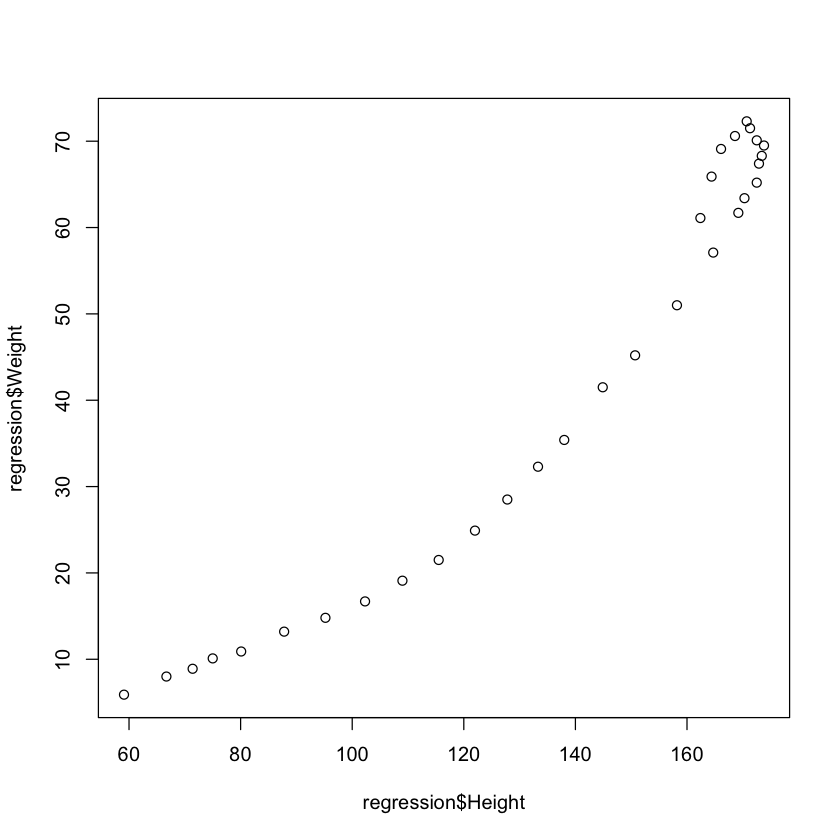

In [98]:
# plot은 데이터 분석가가 처음에 판단을 하기위해 꼭 해봐야 하는 것이다. 
# 머신러닝으로 할지 안할지 판단을 내려야 하기 때문에 
# 예쁜 모양으로 되있다면 ---> 회귀분석으로 해야 정확하다
# VS 머신러닝은 깡통 (데이터 분포)로 하는거라 해야할 때가 다르다. 

plot(regression$Height, regression$Weight)

In [99]:
# 상관계수 --> 진짜 관련이 있을까?
cor(regression$Height, regression$Weight)
# 97%정도 관련이 있다.

[1] 0.9672103

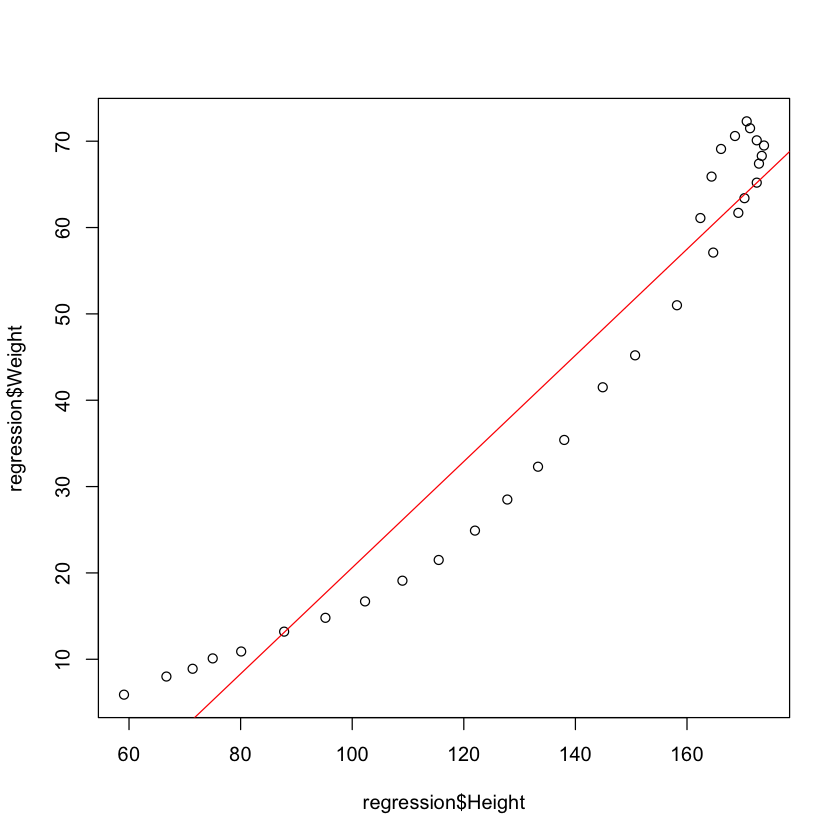

In [100]:
# 97%관련이 있으니까 회귀 분석 해되되겠구나??
# '회귀선' 혹은 '중심선'= 수학적 혹은 '평균선'=통계적

# Tilt
plot(regression$Weight ~ regression$Height)

# 회귀식
r <- lm(regression$Weight ~ regression$Height)

#회귀선 :  회귀식으로 선을 그리는것. 
# y = ax + b 식이다. 
abline(r , col = 'red')

In [ ]:
# 분석 결과
# pvalue, 표준편차.. 등등이 얼마나 되는지
summary(r)


# Coefficients 이 부분이 중요하다
- regression$Height   0.61474    0.02998  20.508  < 2e-16 ***      
  : *** 별 세개가 붙은건 아주 중요하다는 의미             
    ***, **, * , "" 순으로 중요도를 나타낸다     
    
- Adjusted R-squared:  0.9333 --> 예측력을 나타낸다(지금: 93%이다)
- Residual standard error: 6.355 --> 표준 오차 이다 (써도 되는지 안되는지를 판단)
---
p-value: < 2.2e-16 < 0.05       
Adjusted R-squared:  0.9333 : 예측력   (93%// '80%이상만 되도 굉장히 쓸만한것')   
Residual standard error: 6.355 : 표준오차      


In [ ]:
# 회귀식
r

### y = ax + b       
### 몸무게 = 0.6147 * 키 + (-40.8659)
- 공식화 한거다
---

In [ ]:
# 키가 182인 사람의 몸무게
0.6147 * 182 + (-40.8659)

In [ ]:
# 근사값을 말해줘야한다
# 표준오차를 적용한 키가 182인 사람의 몸무게
paste(0.6147 * 182 + (-40.8659) - 6.355, "~", 0.6147 * 182 + (-40.8659) + 6.355)

---
# IQ

In [ ]:
iq <- read.csv("../Data/IQ.csv", fileEncoding = 'euc-kr')
head(iq)

In [ ]:
str(iq)

In [ ]:
# 성적과 가장 관련이 깊은 항목은?
# 제일 처음 것 이름이니까 빼고
cor(iq[,-1])
# IQ > TV > 학원 > 게임 

In [ ]:
# IQ가 126인 사람의 성적을 예측해 보세요..
iqR <- lm(iq$성적 ~ iq$IQ)
summary(iqR)

In [ ]:
# 성적 = 0.6714 * IQ + (-5.2918)
0.6714 * 126 + (-5.2918)
# 표준오차를 적용한 IQ가 126인 사람의 성적
paste(0.6714 * 126 + (-5.2918) - 3.322, "~", 0.6714 * 126 + (-5.2918) + 3.322)

In [ ]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?
# 90점이상?
iqA <- lm(iq$다니는.학원수 ~ iq$성적)
iqA
print("-----")
summary(iqA)

In [ ]:
# 다녀야 하는 학원의 수
0.1241 * 90 + (-7.8916)
paste(0.1241 * 90 + (-7.8916) - 0.7882, "~", 0.1241 * 90 + (-7.8916) + 0.7882)

In [ ]:
# 사람의 성적이 90일 경우의 iQ? 
iqA <- lm(iq$다니는.학원수 ~ iq$성적)
iqA
print("-----")
summary(iqA)

# 다중 회귀 분석
: 여러개의 항목들로 구성된 식으로 예측하는 방법

In [ ]:
data(attitude)
# 대형 금융기관의 사무직 직원을 대상으로 진급의 요소에 대한 설문조사 데이터


In [ ]:
help(attitude)

In [ ]:
head(attitude)

In [ ]:
# 컬럼 6개? 간단하다~ 보통 100개가 넘어감


In [ ]:
str(attitude)
# 회귀식은 다 num이여야 가능하다

In [ ]:
# 아까는 y = ax + b => 단순회귀
# y = ax + b + c + d + e ... => 다중회귀
# rating을 제외한 변수들이 rating에 미치는 영향 
# .은 종속변수 제외한 나머지 다를 의미
model <- lm(rating ~ ., data = attitude)
model

#### 수식
- rating = 0.61319 * complaints + ... + -0.21706 * advance + 10.78708

In [ ]:
# Model의 검토 -> 쓸만하냐?
summary(model)

---
#### 위를 확인 해보면 rating 에 영향을 주는 데이터는 complaints(***), learning(.)
#### 위의 데이터 summary를 통해서 이해해야 한다.
- Adjusted R-squared:  0.6628

---


In [ ]:
# 기여도에 따른 함수 생성
# model <- lm(rating ~ ., data = attitude)

# 기여도가 낮은 변수를 제거하여 함수 생성
reduced <- step(model, direction = "backward")
# rasies 

In [ ]:
summary(reduced)

----
아까 데이터 : Adjusted R-squared: 0.6628 

정제후 데이터 : Adjusted R-squared:  0.6864 
-> 아까 전부다 했을때보다 예측력이 높아짐(나머지 데이터 쓸모없는것들)
결론 : summary확인 해보면 complaints(***)만 있는것. -> 나머지 데이터들 다 의미가 없다는 뜻.
---

---

In [ ]:
# iris에 대한 다중 회귀 분석
str(iris)
iris$Species <- as.numeric(iris$Species)
str(iris)

In [ ]:
summary(iris)

In [ ]:
irisM <- lm(as.numeric(iris$Species) ~ ., data = iris)

summary(irisM)

reducedIris <- step(irisM, direction = "backward")

In [ ]:
summary(reducedIris)

정제전 데이터 : Adjusted R-squared:  0.9285         
정제후 데이터 : Adjusted R-squared:  0.9287        

----
# 주성분 분석
: 서로 연관되어 있는 변수들을 전체적으로 가지고 있는 정보를 분석하여 최대한        
적은수의 새로운 변수를 생성하는 방법
- 지표를 분석하는 것이다.

# pasta.txt로 분석

In [ ]:
# 설문지를 이용한 주성분 분석
data <- read.table("../Data/pasta.txt")
head(data)
# 맛에 대한 데이터만 주시면~~
# 소스가?
# 접시가 이뻐야하냐?
# 누들이?


In [ ]:
# 다중 공선성 : 너무 상관성이 높아서 마치 쌍둥이 데이터가 존재하는것 .
# A,B,C 가 있을때 A와 B가 너무 같을때 둘중 한개만 선택해서 데이터로 쓰는것
cor(data)

In [ ]:
# 표준화 : 평균을 0으로 표준편차는 1로 변경하는 것. 
# 표준편차 그래프가 서로 떨어져 있을경우 한 기준으로 모으는것 
data1 <- scale(data)
# 평균값을 다 0 으로 바뀌었다. (값 차이가 많이 안날경우 안함.)
summary(data1)

In [ ]:
# 표준 편차 1로 변경됨 
# 계수가 똑같은 것중에 하나만 A or B 
apply(data1, 2, sd)

In [ ]:
# 주성분 분석
# data 표준화 된것아님
p1 <- prcomp(data, scale = T)
biplot(p1)
# *** 화살표와 가까울 수록 그 컬럼에 대한 점수를 잘 받았다는 의미이다. ***
# Marinara ,Alfredo 를 만든 주방장은 Out

# 라면.txt로 분석

In [ ]:
# 설문지를 이용한 주성분 분석
ramen_data <- read.table("../Data/라면.txt", fileEncoding = "euc-kr")
head(ramen_data)

In [ ]:
cor(ramen_data)

In [ ]:
# 표준화 : 평균을 0으로 표준편차는 1로 변경하는 것. 
# 표준편차 그래프가 서로 떨어져 있을경우 한 기준으로 모으는것 
ramen1 <- scale(ramen_data)
# 평균값을 다 0 으로 바뀌었다. (값 차이가 많이 안날경우 안함.)
summary(ramen1)

In [ ]:
# 표준 편차 1로 변경됨 
# 계수가 똑같은 것중에 하나만 A or B 
apply(ramen1, 2, sd)

In [ ]:
# for mac 쓰는 사람들 필요 --> 한글 때문에 
options(warn = -1 )
par(family = "AppleGothic")

# 주성분 분석
# ramen_data 표준화 된것아님
p2 <- prcomp(ramen_data, scale = T)
biplot(p2)
# *** 화살표와 가까울 수록 그 컬럼에 대한 점수를 잘 받았다는 의미이다. ***


# U.S Arrests
: 1973년 미국 50개 주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계 데이터       
도시지역에 살고 있는 인구의 비율

In [ ]:
data(USArrests)
head(USArrests)

- Murder : 살인, Assualt : 폭행, UrbanPop: 도시인구밀도, Rape : 강간

In [ ]:
cor(USArrests)

In [ ]:
# 주성분 분석
result <- princomp(USArrests, cor = T)
summary(result)
# Comp.1    Comp.2    Comp.3     Comp.4 -> 새로운 변수다. 
# Comp1 -> 62% 대변하면 comp2 24% 필요 없음.

In [ ]:
biplot(result)

In [ ]:
# Comp1으로 주성분 자료 정리
result$loadings
# Comp1 = 0.536* Murder + 0.583 * Assault + 0.278 * UrbanPop + 0.543 * Rape

In [ ]:
# 제 1주성분으로 새로운 변수값 생성
score <- 
0.536* USArrests$Murder + 0.583 * USArrests$Assault +
        0.278 * USArrests$UrbanPop + 0.543 * USArrests$Rape

In [ ]:
# 어느 동네가 살만한지 분석한거다.
score

In [ ]:
# States와 주성분 값으로 데이터 프레임 생성
Result <- data.frame(States = rownames(USArrests), Score = score)
head(Result)

In [ ]:
# arrange 쓰고 싶으면 
library(dplyr)


In [ ]:
# 우선 순위 알아보기
head(arrange(Result, desc(Score)))


--- 
# 인공신경망(Artificial Neural Network)


In [ ]:
# Deep Learning 은 인공신경망에서만 쓸수 있는 함수망이다 <- 대수학이다.
# 1) 선형 분류 -> 이쁘게 되있는것(회귀분석)
# 2) 비선형 분류 -> 환공포증을 유발하게 되있는것(Machine Learning)


In [ ]:
# 인공신경망의 구조-> Output Layer, Hidden Layer, Input Layer

In [ ]:
# Before Training // After Training(학습후 가중치 확정: 많은쪽)
# -> 양질의 데이터를 많이 줘야한다. 


In [ ]:
# 다층 퍼셉트론 (Multilayer perceptron)--> (AlphaGo 방식)


In [ ]:
# 인공 신경망 학습절차
1단계: 자료의 수집 - 정확하고 충분한 자료의 수집이 중요
2단계: 자료의 준비 - 비계량 자료의 계량화
                이상치 제거
                학습용 자료와 검증용 자료의 정의
                전처리 과정
3단계: 신경망의 구조와 학습 모수의 결정
      은닉층의 수와 은닉노드의 수 (*은닉층의 수가 많은 것이 'Deep Learning')
      학습률, 학습 중지점 등..
4단계: 학습과 검증
      ....
---> 자료 다 받는다.(Github)


In [ ]:
# 잘 정제된 데이터
head(iris)

### 학습용 데이터와 검증용 데이터를 분리하는 작업

In [55]:
# 70% 는 35개
#sample(1:50, 35)
#
#sample(51:100, 35)
#
#sample(101:150, 35)

# Vector 화
# 실행 할때마다 바뀐다 -> 문제
# ramdom 하게 쓰게되는 데이터를 정해주는것
set.seed(1234)
samp<-
c(sample(1:50, 35),
sample(51:100, 35),
sample(101:150, 35))
samp

[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [26]:
# 학습용 데이터
data.train <- iris[samp,]

In [27]:
# rownames가 중요하다 --> 필요하다면 정제 해야함
print(head(data.train))

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
28          5.2         3.5          1.5         0.2  setosa
16          5.7         4.4          1.5         0.4  setosa
22          5.1         3.7          1.5         0.4  setosa
37          5.5         3.5          1.3         0.2  setosa
44          5.0         3.5          1.6         0.6  setosa
9           4.4         2.9          1.4         0.2  setosa


In [28]:
# 검증용 데이터 = 선택된것 제외한 데이터
data.test <- iris[-samp,]

In [29]:
summary(data.train)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

In [30]:
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

# 학습시키기

In [31]:
library(nnet)

In [32]:
# size : 은닉층 개수
model.nnet <- nnet(Species ~ ., data = data.train, size = 3)

# weights:  27
initial  value 121.492256 
iter  10 value 110.581609
iter  20 value 49.740861
iter  30 value 26.600820
iter  40 value 1.834814
iter  50 value 0.008937
final  value 0.000074 
converged


# 문제 및 정답 만들기

In [33]:
# x 라는 변수의 시험문제를 만들것이다.
# 컬럼 Species 빼고 만들어라
x <- subset(data.test, select = -Species)
# y는 정답
y <- data.test$Species

# 검증하기 

In [34]:
# 시험 보는 것 
# model.nnet이 시험 보는것 -> x 문제를 맞춰라
pred <- predict(model.nnet, x, type = "class") # -> class : 객관식 문제, raw : 주관식 문제 
pred

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "virginica"  "versicolor" "versicolor"
[26] "versicolor" "versicolor" "versicolor" "virginica"  "versicolor"
[31] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[41] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

---
# 예측력 확인

In [35]:
# True 1 False 0 - > 그것의 평균을 구하면 
mean(pred == y) 

[1] 0.9555556

---
### 정오표(오분류표)


In [36]:
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         0
  virginica       0          2        15

---
### 학습시킨 머신 러닝 사용하기

In [38]:
# Sepal.Length = 5.3
# Sepal.Width = 3.3
# Petal.Length = 1.6
# Petal.Width = 0.3
class(x)

[1] "data.frame"

In [49]:
predict(model.nnet, list(Sepal.Length = 5.3
                               ,Sepal.Width = 3.3
                               ,Petal.Length = 1.6
                               ,Petal.Width = 0.3), type = "class")

# 정확한 데이터는 아니다 iris = 150 개이지만 model.nnet - 105 개
# model.nnet <- nnet(Species ~ ., data = data.train, size = 3) <- 전체 데이터 아님.

[1] "setosa"

In [50]:
# 사용 가능하다고 판단되면 모든 데이터를 기준으로 학습
# 전체 데이터 이다.
model.nnet <- nnet(Species ~ ., data = iris, size = 3)

# weights:  27
initial  value 180.656304 
iter  10 value 58.982459
iter  20 value 7.654091
iter  30 value 5.476439
iter  40 value 4.943576
iter  50 value 4.922347
iter  60 value 4.921965
final  value 4.921959 
converged


In [51]:
predict(model.nnet, list(Sepal.Length = 5.3
                               ,Sepal.Width = 3.3
                               ,Petal.Length = 1.6
                               ,Petal.Width = 0.3), type = "class")


[1] "setosa"

In [ ]:
# Sepal.Length = 9.3
# Sepal.Width = 2.3
# Petal.Length = 7.5
# Petal.Width = 3.5


In [52]:
# 'virginica' 틀렸다  --> 머신러닝이 모르면 막 떤진다.
predict(model.nnet, list(Sepal.Length = 9.3
                               ,Sepal.Width = 2.3
                               ,Petal.Length = 7.5
                               ,Petal.Width = 3.5), type = "class")


[1] "virginica"

In [53]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

---
# 의사결정나무(ctree)

In [56]:
# Package를 설치해야함
# install.packages("party")
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [57]:
# Sampling 편하게 하기 
set.seed(1234)
library(caret)
# caret을 쓰면 -> createDataPartition을 쓸수있게 됨

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [58]:
# 학습용 데이터
# p = percent
samp <- createDataPartition(iris$Species, p = 0.7, list = F)

In [59]:
# 학습용
data.train <- iris[samp,]
# 검증용
data.test <- iris[-samp,]

In [65]:
# 문제 및 정답 만들기

#문제 <- data.frame
x <- data.test[,-5]
#정답 <- Vector
y <- data.test[,5]

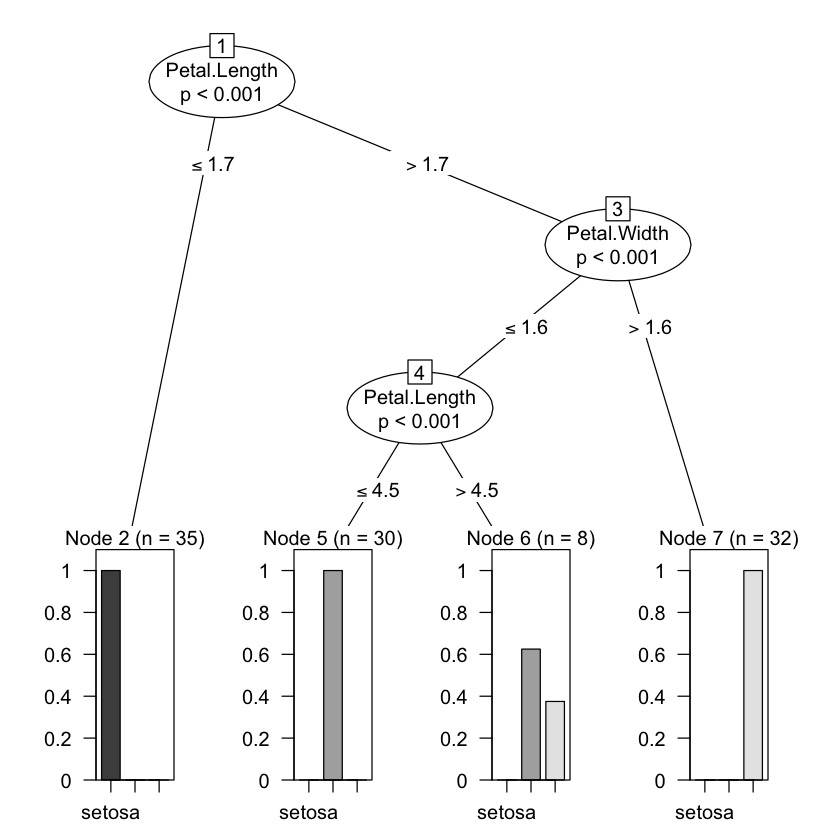

In [69]:
# 학습시키기
model.ctree <- ctree(Species ~ ., data = data.train)
plot(model.ctree)

In [70]:
# 검증하기
pred <- predict(model.ctree, x)

In [71]:
# 예측력 88%
mean(pred == y)

[1] 0.8888889

In [72]:
# 오분류표 
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

---
# RandomForest

In [73]:
# tree 로는 안되서 --> Forest로 만든 것
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [74]:
# 학습시키기
rf <- randomForest(Species ~ ., data = data.train, ntree = 100)


In [75]:
# 검증하기 
pred <- predict(rf, x)

In [76]:
# 예측력
mean(pred == y)

[1] 0.9333333

In [77]:
# 오분류표
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

## 교통사고 예측하기(회귀식과 RandomForest 예측 비교)


In [79]:
seoul <- read.csv("../Data/newSeoulAccident.csv", fileEncoding = "euc-kr")
head(seoul)

연도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [82]:
# 종로구 데이터셋 만들기
JongRoGu <- subset(seoul,자치구명 == '종로구')
nrow(JongRoGu)

[1] 84

In [83]:
head(JongRoGu)

연도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [84]:
# 84개인데 1812까지 있다. --> 정리 필요
tail(JongRoGu)

,연도,월,자치구명,발생건수,사망자수,부상자수
1807,2017,7,종로구,87,2,141
1808,2017,8,종로구,81,0,119
1809,2017,9,종로구,112,1,155
1810,2017,10,종로구,94,0,145
1811,2017,11,종로구,97,2,115
1812,2017,12,종로구,108,2,155


In [85]:
# rownames 정리하기 
rownames(JongRoGu) <- c()
tail(JongRoGu)

,연도,월,자치구명,발생건수,사망자수,부상자수
79,2017,7,종로구,87,2,141
80,2017,8,종로구,81,0,119
81,2017,9,종로구,112,1,155
82,2017,10,종로구,94,0,145
83,2017,11,종로구,97,2,115
84,2017,12,종로구,108,2,155


In [86]:
str(JongRoGu)
# 종로구 인데?? '강남구', '강동구'... --> 정리해야한다.

'data.frame':	84 obs. of  6 variables:
 $ 연도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [87]:
# Factor 정리하기 
JongRoGu$자치구명 <- factor(JongRoGu$자치구명)
str(JongRoGu)

'data.frame':	84 obs. of  6 variables:
 $ 연도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [88]:
# 회귀식
# 종로 발생건수와 부상자수의 상관계수
cor(JongRoGu$발생건수, JongRoGu$부상자수)

# 90% --> 관련 --> 회귀식 쓸수 있겠어?? YES

[1] 0.9078793

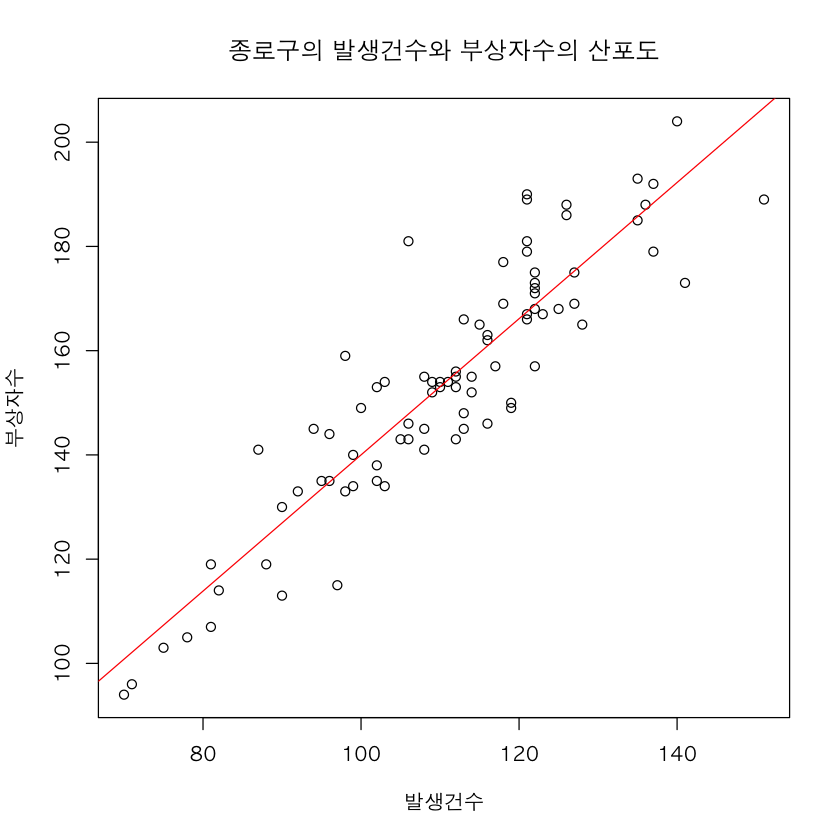

In [123]:
## 내가 한거  --<<<
# for mac
options(warn = -1)
par(family = "AppleGothic")
# Tilt
plot(JongRoGu$부상자수 ~ JongRoGu$발생건수,
     xlab="발생건수",
     ylab="부상자수",
     main="종로구의 발생건수와 부상자수의 산포도"
    )
# 회귀식
r <- lm(JongRoGu$부상자수 ~ JongRoGu$발생건수)

#회귀선 :  회귀식으로 선을 그리는것. 
# y = ax + b 식이다. 
abline(r , col = 'red')

In [112]:
summary(r)


Call:
lm(formula = JongRoGu$부상자수 ~ JongRoGu$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.084  -6.149  -0.410   4.756  33.156 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.34192    7.44736   1.254    0.213    
JongRoGu$발생건수  1.30662    0.06663  19.610   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.08 on 82 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8221 
F-statistic: 384.6 on 1 and 82 DF,  p-value: < 2.2e-16


In [113]:
# 회귀식
r


Call:
lm(formula = JongRoGu$부상자수 ~ JongRoGu$발생건수)

Coefficients:
      (Intercept)  JongRoGu$발생건수  
            9.342              1.307  


In [133]:
# 부상자수 = 1.307 * 발생건수
# 발생건수 : 100건
paste("부상자수 :", 1.307 * 100 + 9.342,"명")

[1] "부상자수 : 140.042 명"

----


In [135]:
# RandomForest로 예측(발생건수 : 100)
rf <- randomForest(부상자수 ~ 발생건수, data = JongRoGu, ntree = 100)
predict(rf, list(발생건수=100))

1 
143.0345

In [136]:
# 발생건수가 145건 이면?
paste("부상자수 :", 1.307 * 145 + 9.342,"명")

[1] "부상자수 : 198.857 명"

In [137]:
# RandomForest로 예측(발생건수 : 145)
rf <- randomForest(부상자수 ~ 발생건수, data = JongRoGu, ntree = 100)
predict(rf, list(발생건수=145))
# 데이터가 다르면 다르게 나올수 있다. 145명일 경우 회귀선에서 보면(plot) 데이터 없음
# 그냥 머신러닝은 데이터를 막떤진다 

1 
184.8648

In [139]:
# 발생건수가 85건 이면?
paste("부상자수 :", 1.307 * 85 + 9.342,"명")

[1] "부상자수 : 120.437 명"

In [140]:
# RandomForest로 예측(발생건수 : 85)
rf <- randomForest(부상자수 ~ 발생건수, data = JongRoGu, ntree = 100)
predict(rf, list(발생건수=85))


1 
128.1373

In [141]:
# 발생건수가 150건 이면?
paste("부상자수 :", 1.307 * 150 + 9.342,"명")

[1] "부상자수 : 205.392 명"

In [142]:
# RandomForest로 예측(발생건수 : 150)
rf <- randomForest(부상자수 ~ 발생건수, data = JongRoGu, ntree = 100)
predict(rf, list(발생건수=150))


1 
185.9317